#### CMSE 202 Final Project
### &#9989; Mateja Milicevic, Blake Christiansen, Eli Denslow, Alan Leon
### &#9989; Section_001
#### &#9989; 12/04/2022

# Can you predict a stock using methods we learned in class and some extra

## Research question and motivation
The idea is to try and use methods of machine learning that we learned in class in order to try and predict price of a stock <br>
For this project we have used the TESLA(TSLA) stock.<br>
For supervised machine learning we have used Tensorflow and for Unsupervised we have used PyTorch and CUDA. <br>
The motivation behind the project is mostly due to the fact that the stock market in general is very hard to predict even with advance methods. <br>
So we just decided to take a crack at it.

# Methods for Supervised Learning
For supervised learning we got our data from yfinance API and trained a LTSM model on it. We used template models from tensorflow. <br>
Than we compared the data to the actual prices

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
import pandas_datareader as web

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

2022-12-04 22:34:19.271160: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-04 22:34:19.502901: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-04 22:34:19.502921: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-04 22:34:20.560504: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

In [ ]:
#!pip install sklearn
#!pip install tensorflow
#!pip install scikit-learn

In [4]:
#Load Data

company='TSLA'

start=dt.datetime(2012,1,1)
end=dt.datetime(2021,1,1)

#pull data from yahoo finance
data=web.DataReader(company, 'yahoo', start, end)



Here pandas data reader is used to pull data from the yahoo finance api for a certain time range as seen above using web.DataReader. The time range selected was from the first of January 2012 til the first of January 2021, which were stored in the start and end variables. Using web.DataReader a dataframe with all respective dates within the time frame and the each dates  High price, Low price, Open price, Volume, and Adj Close, is created. For this project, we will focus on using the closing prices to predict future closing prices as seen below. So data['close'] will be used frequently to accesss the values of closing prices of the TSLA ticker representing the company Tesla. 

In [5]:
# Prepare Data

scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(data['Close'].values.reshape(-1,1))

prediction_days=60

The data must be scaled into values between 0 and 1, in order to be used in the LSTM and Dropout models to predict future price.  In this case the closing prices is being manipulated using MinMax Scaler function from sklearn.preprocessing. The data can later be readjusted by unscaling afterwards to get the true closing price values. The prediction_days variable is also set. This variable represents how many days in the past are used to base the prediction on for closing price in the future. 

In [6]:
x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x,0])
    y_train.append(scaled_data[x,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train=np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
    

Here the training data is defined. The training data will iterate from the 60th index set by the prediction_days variable till the last index. For x train we will append 60 values for each x in the iteration and also an additional value so that the model can learn to predict what the 61st value is going to be. Then x_train and Y_train are converted into numpy arrays using np.array. Finally, x_train is reshaped so that it can be used as an input to the LSTM model, which will be seen in the next cell. 

In [7]:
#Build The Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1)) #Prediction of the Next Closing Value
          
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)
          


2022-12-04 22:34:41.387627: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-04 22:34:41.387659: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-04 22:34:41.387689: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (matmil): /proc/driver/nvidia/version does not exist
2022-12-04 22:34:41.387966: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/25
69/69 [==============================] - 14s 126ms/step - loss: 0.0033
Epoch 2/25
69/69 [==============================] - 9s 133ms/step - loss: 7.5968e-04
Epoch 3/25
69/69 [==============================] - 8s 120ms/step - loss: 7.1992e-04
Epoch 4/25
69/69 [==============================] - 7s 98ms/step - loss: 7.4591e-04
Epoch 5/25
69/69 [==============================] - 7s 100ms/step - loss: 7.0148e-04
Epoch 6/25
69/69 [==============================] - 8s 122ms/step - loss: 6.6199e-04
Epoch 7/25
69/69 [==============================] - 7s 95ms/step - loss: 5.8774e-04
Epoch 8/25
69/69 [==============================] - 8s 114ms/step - loss: 7.1806e-04
Epoch 9/25
69/69 [==============================] - 7s 102ms/step - loss: 5.0284e-04
Epoch 10/25
69/69 [==============================] - 7s 97ms/step - loss: 5.8063e-04
Epoch 11/25
69/69 [==============================] - 7s 97ms/step - loss: 5.1626e-04
Epoch 12/25
69/69 [==============================] - 8s 121ms/step - l

Here the model is built using a sequential model. This basic neural network model uses repeated layers to produce the model. In this case, one LSTM will be used then a Dropout, repeatedly, until the final layer which is the Dense layer. This dense layer is responsible for the closing stock price prediction. Here units 50 were used and three layers. Generally, when more layers are used the longer it will take to train the data. For efficiency, three layers were used. The same is also true for the units argument within the LSTM layers. Finallly, the model is compiled using adam optimizer with the loss function being mean squared error, and the model is fitted using the training data.

In [8]:
#accuracy test on existing data

#prepare test data

test_start=dt.datetime(2021,1,1)
test_end=dt.datetime(2022,11,1)

test_data= web.DataReader(company, 'yahoo', test_start, test_end)

actual_prices=test_data['Close'].values

total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)
model_inputs = total_dataset[len(total_dataset)-len(test_data)-prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)

Here the model is tested to see how well it would perform on past data. First test data is prepared using datetime module in python.  The test data is created using the same TSLA ticker symbol by calling the ticker variable to web.DataReader. Then the closing prices are pulled from test_data using ['Close']. Afterwards, the test_data dataframe is concatenated with the 'data' data frame which was used previously using pd.concat. This allows for predictions to be made on the existing data. However, in order for the model to be able to make those predictions the test_data must be reshaped as done prior specifically for the LSTM layers of Sequential neural network, which is performed in the last two lines of the cell above. 

In [9]:
#Make Predicitions on Test Data

x_test=[]
for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])
    
x_test=np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_prices= model.predict(x_test)
predicted_prices=scaler.inverse_transform(predicted_prices)

15/15 [==============================] - 1s 19ms/step


Here predictions are being made on the existing test data. Like previously we will iterate through predicition_days index value 60 until the length of the concatenated data and test_data dataframe which are assigned to the model_inputs variable. Then append values to x_test by indexing model_inputs then convert x_test into a numpy array. Afterwards, the x_test is reshaped so that the model can once again predict prices using x_test by using model.predic(x_test). The last line transforms the closing prices back to their real values so that true price can be compared (no longer want data from 0 to 1). 


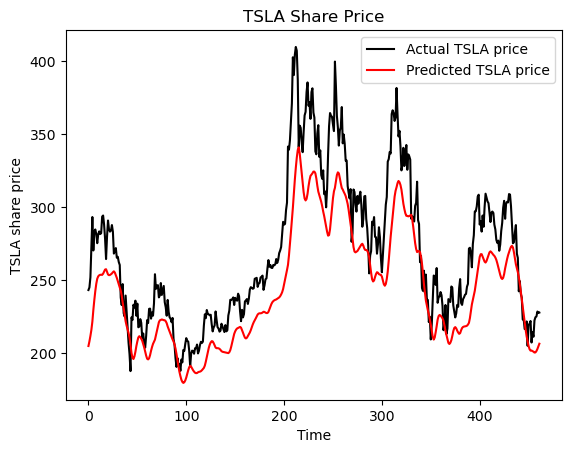

In [10]:
#Plot Test Predictions
plt.plot(actual_prices, color='black', label=f"Actual {company} price")
plt.plot(predicted_prices, color='red', label=f"Predicted {company} price")
plt.title(f"{company} Share Price")
plt.xlabel('Time')
plt.ylabel(f'{company} share price')
plt.legend()
plt.show()

# Results for Supervised Learning
Here the existing test_data is ploted against the models predicted prices using matplotlib.pyplot. With the models predictions of the test_data in red and the actual prices for the test_data in black. As can be seen for the visualization the model is not very accurate for numerous reasons. Since the model is currently using closing price to predict closing price it is reactionary. This is exemplified by the rightward shift of the predicted price from the actual price. The model is reacting to changes in price and responding accordingly but not effectively predicting it like we would like it to. Additionally, the model underpredicts many of the highs or peaks in the closing price. This model could be improved using more technical analysis indicators. For example, RSI could be used as a component in the prediction of stock price. As you can see the RMSE is 68 which is not that great but considering that stock prices are so unpredictable this is a decent result

In [11]:
np.sqrt(np.mean((predicted_prices-actual_prices)**2))

68.68145499614782

In [13]:
#ADJUSTING DATA FOR TRADE EXPERIMENT
test_data['Predicted Prices'] = predicted_prices
test_data

,High,Low,Open,Close,Volume,Adj Close,Predicted Prices
Date,,,,,,,
2021-01-04,248.163330,239.063339,239.820007,243.256668,145914600.0,243.256668,219.619156
2021-01-05,246.946671,239.733337,241.220001,245.036667,96735600.0,245.036667,223.096786
2021-01-06,258.000000,249.699997,252.830002,251.993332,134100000.0,251.993332,227.165146
2021-01-07,272.329987,258.399994,259.209991,272.013336,154496700.0,272.013336,231.739212
2021-01-08,294.829987,279.463318,285.333344,293.339996,225166500.0,293.339996,237.852966
...,...,...,...,...,...,...,...
2022-10-26,230.600006,218.199997,219.399994,224.639999,85012500.0,224.639999,216.886124
2022-10-27,233.809998,222.850006,229.770004,225.089996,61638800.0,225.089996,217.936386
2022-10-28,228.860001,216.350006,225.399994,228.520004,69152400.0,228.520004,219.481979


# Methodology for Reinforcement Learning 

For the methods above we have used Reinforcment Learning in order to test can our stock prediction of price by fake trading it. <br>
Reinforcement Learning is a form of unsupervised Machine Learning. In order to make it work we have to create the model, agent and the enviornment. <br>
## Model
Model is a Feed Forward Neural Network. It is consisted of Input, hidden and output layer. <br>
Input layer is the part of the network that coresponds to the state of our agent. <br>
State is a matrix that better describes the attributes that might be useful four our model to make decisions. <br>
In our case the state we used is fairly simple due to limited amount of data we could gather, so it only consists of <br>
price of the stock, our balance and current portfolio performance. <br>
Hidden layer is consisted of many nodes and weights that do mathematical operations on our state so the product gives it's preferable action to maximize the reward. <br>
Output layer is the action prefered by the model and usually you take the argmax of that array as the best action.<br>
## Agent
Agent here is a portoflio that can act on decisions made by the model. It has 3 options. Sell, buy and hold. <br>
The actions due to simplicity are limited to selling and buying 5 stocks at a time. <br>
Our agent also gathers the information for the state <br>
## Environment
The world our agent interacts with, in this case the simulation of the stock market. <br>
Mny limitations due to short window for work on the project. <br>
No intraday trading and also impossible scenario where you buy the stock at it's actual price, no ask/bid. <br>
For our test we ran the simulation 10000 times and saved the model that got the best results.

In [ ]:
game = Game(test_data, 1000)

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import os

class QNet(nn.Module):
    """
    Creates Feed forward neural network
    """
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, output_size)
        if os.path.exists('./model/model.pth'):
            self.load_state_dict(torch.load('model/model.pth'))
        
    """
    Feeds our state to the network and returns the action    
    """
    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = self.linear2(x)
        return x
    """
    Saves the model so when you run the  code again it will use the saved model
    """
    def save(self, file_name='model.pth'):
        model_folder_path = './model'
        if not os.path.exists(model_folder_path):
            os.makedirs(model_folder_path)

        file_name = os.path.join(model_folder_path, file_name)
        torch.save(self.state_dict(), file_name)


class QTrainer:
    def __init__(self, model):
        self.lr = 0.001
        self.gamma = 0.5
        self.model = model.to("cuda:0")
        self.optimizer = optim.Adam(model.parameters(), lr=self.lr)
        self.criterion = nn.MSELoss()
    """
    Training the model by using backpropagation that tries to find the local minimum
    of the loss function
    """    
    def train_step(self, state, action, reward, next_state, done):
        state = torch.tensor(state, dtype=torch.float, device = torch.device("cuda:0"))
        next_state = torch.tensor(next_state, dtype=torch.float,device = torch.device("cuda:0"))
        #print(action)
        action = torch.tensor(action, dtype=torch.long, device = torch.device("cuda:0"))
        reward = torch.tensor(reward, dtype=torch.float, device = torch.device("cuda:0"))
        # (n, x)

        if len(state.shape) == 1:
            # (1, x)
            state = torch.unsqueeze(state, 0)
            next_state = torch.unsqueeze(next_state, 0)
            action = torch.unsqueeze(action, 0)

            reward = torch.unsqueeze(reward, 0)
            done = (done, )

        # 1: predicted Q values with current state
        pred = self.model(state)

        target = pred.clone()
        
        for idx in range(len(done)):
            Q_new = reward[idx]
            if not done[idx]:
                Q_new = reward[idx] + self.gamma * torch.max(self.model(next_state[idx]))

            #print(action)
            target[idx][torch.argmax(action[idx]).item()] = Q_new
    
        
        self.optimizer.zero_grad()
        loss = self.criterion(target, pred)
        loss.backward()

        self.optimizer.step()





In [20]:
import random
import torch
from collections import deque
import pandas as pd
import numpy as np
learning_rate = 0.001
class Agent:

    def __init__(self, cash):
        
        self.cash = cash
        self.init_balance = cash
        self.holdings_value = 0
        self.value = cash
        self.n_stocks = 0
        self.memory = deque(maxlen=1000000)
        self.holdings_average = 0
        self.performance = 0
        self.model = QNet(7,120,3)

        learning_rate = 0.001
        self.trainer = QTrainer(self.model)
        self.epochs = 0

    def getState(self, data):
        state = [data[1]['Open'], data[1]['Predicted Prices'], self.n_stocks, 
        self.cash, self.holdings_value, self.holdings_average, self.performance]
        return state
    
    def getAction(self,state):
        self.epsilon = 300 - self.epochs
        final_action = [0,0,0]
        if random.randint(0, 240) < self.epsilon:
            move = random.randint(0,2)
            final_action[move] = 1
        else:
            
            state0 = torch.tensor(state, dtype = torch.float, device = torch.device("cuda:0"))
            prediction = self.model(state0).to("cuda:0")
            move = torch.argmax(prediction).item()
            final_action[move] = 1
        return final_action

    def openPosition(self, data):
        if(self.cash >= data[1]['Open'] * 5):
            self.cash -= data[1]['Open'] * 5
            self.holdings_value = self.n_stocks * data[1]['Open'] + data[1]['Open'] * 5
            self.n_stocks += 5
            self.holdings_average = self.holdings_value / self.n_stocks
            self.value = self.cash + self.holdings_value
            return True
        else:
            return False
    def closePosition(self, data):
        if(self.n_stocks >= 5):
            self.cash += data[1]['Open'] * 5
            self.holdings_value = self.n_stocks * data[1]['Open'] - data[1]['Open'] * 5
            self.holdings_average = self.holdings_value / self.n_stocks
            self.n_stocks -= 5
            return True
        else:
            return False
    def calcPerformance(self):
        self.performance = self.value/self.init_balance
    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))
    def trainLongMemory(self):
        if len(self.memory) > 1000:
            mini_sample = random.sample(self.memory, 1000)
        else:
            mini_sample = self.memory

        states, actions, rewards, next_states, dones = zip(*mini_sample)
        self.trainer.train_step(states, actions, rewards, next_states, dones)
    def train_short_memory(self, state, action, reward, next_state, done):
        self.trainer.train_step(state, action, reward, next_state, done)

In [23]:

import pandas as pd
import matplotlib.pyplot as plt
class Game:
    def __init__(self, data, iterations):
        self.data = data
        self.iterations = iterations
        self.agent = Agent(10000)
        self.record = 1
        self.df = pd.DataFrame()
        
    def run_test(self):
        n_list = []
        p_list = []
        for n in range(0,self.iterations+1):
            
            for s in self.data.iterrows():
                state = self.agent.getState(s)
                action = self.agent.getAction(state)
                if(action.index(max(action)) == 0):
                    self.agent.openPosition(s)
                elif(action.index(max(action)) == 1):
                    self.agent.closePosition(s)
                else:
                    pass
                self.agent.calcPerformance()
                new_state = self.agent.getState(s)
                self.agent.remember(state, action, self.agent.performance - 1, new_state, False)
                self.agent.train_short_memory(state, action, self.agent.performance - 1, new_state, False)
            perfromance = self.agent.performance
            if(perfromance > self.record):
                self.record = perfromance
                self.agent.model.save()
                self.agent.remember(state, action, perfromance, new_state, True)
            else:
                self.agent.remember(state, action, 0, new_state, True)
            self.agent.trainLongMemory()
            n_list.append(n)
            p_list.append(perfromance)
            self.agent.epochs += 1
            self.agent.cash = 10000
            self.agent.holdings_value = 0
            self.agent.n_stocks = 0
            self.agent.holdings_average = 0
            self.agent.value = 10000
            self.agent.performance = 1
        self.df['iterations'] = n_list
        self.df['Performance'] = p_list
        plt.scatter(self.df['iterations'], self.df['Performance'])

In [26]:
game = Game(test_data, 10000)

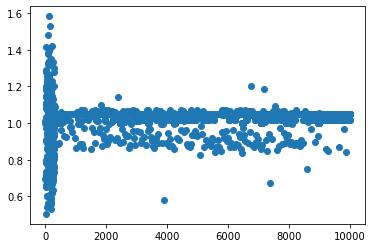

In [27]:
#DO NOT RUN AGAIN IT TAKES A LONG TIME
os.environ['CUDA_VISIBLE_DEVICES'] ='0'
game.run_test()

In [29]:
import numpy as np
print(np.mean(game.df['Performance']))
print(np.median(game.df['Performance']))

1.0439323024980516
1.050226661682129


# Results of Reinforcement Learning
## Action exploration and saving the model
In the first 300 simulations the agent a lot of times makes completely random decisions in what is know as policy exploration. <br>
Policy exploration determines what is best action to be used for every state. Given the fact that state space is theoratically infinite <br>
we were unable to find the optimal policy. If we did we would not mention it in this notebook and would go on to start an Investment Fund. <br>
But, it seems that with what are coin flip decisions you could achieve staggering 60% in one year of trading. With those results you would beat more than 90% of traders on the stock market. <br>
It even beats the best performance when decisions are purely model based, 20%. Although it might be trivial we only save the 20% performing model. <br>
Because at the end of the day coin flip decisions on the stock market can lead to even losing more that haf of your portfolio. <br>
With model based trading we only see it dip to losses of around 20% max. There are some outliers but they are all discarded as we are only concerned with our best performing model. <br>
# Conclusion
We believe that in order to get better results one would need two things, better data and better back testing system <br>
For now our model is only trading based on price and price only, and being profitable is actualy very promising. With more data and indicators we could see better results. <br>
But in order to get it anywhere close to live-market ready it takes millions of simuations. Our simulation method is very slow and languages such as C++ would be preferable. <br>
Implementation of mutlti-threading as well would help a lot.